<a href="https://colab.research.google.com/github/harishmuh/machine_learning_practices/blob/main/Text_Mining_(Part_I_and_II).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
# **Text mining (Part I)**
---

## **What is text mining?**
Text mining (also known as text data mining or text analytics) is the process of extracting useful patterns, insights, or knowledge from unstructured text data using techniques from natural language processing (NLP), machine learning, and statistics.

## **What is the goal of text mining?**

| Goal                       | Description                                                         |
| -------------------------- | ------------------------------------------------------------------- |
| 🔍 **Discover Patterns**   | Identify trends, frequent terms, and associations in text           |
| 📊 **Classify Text**       | Assign labels (e.g., spam vs. ham, positive vs. negative sentiment) |
| 🧠 **Extract Meaning**     | Understand the underlying themes or topics (e.g., topic modeling)   |
| 📈 **Make Decisions**      | Use text data to support business, research, or policy decisions    |
| 💬 **Understand Language** | Analyze linguistic structure and usage                              |



## **Study case**

At this moment, we will learn to perform text mining on text message dataset in two parts:
* Part 1: Preprocessing text data and exploratory data analysis.
* Part 2: Build machine learning model to discriminate text message as spam and non-spam (ham).

| Term     | Meaning                                                          |
| -------- | ---------------------------------------------------------------- |
| **Spam** | Unwanted or junk messages (e.g., ads, scams)                     |
| **Ham**  | Genuine, non-spam messages (e.g., from friends, banks, services) |


In [1]:
# Importing library
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# remove warning
import warnings
warnings.filterwarnings('ignore')

# Plot style
plt.style.use('ggplot')

## Preprocessing Part 1

* Lowercase
* Remove contraction
* Remove number
* Remove punctuation
* Remove stopwords
* Remove whitespace

In [2]:
# Loading dataset
url = 'https://raw.githubusercontent.com/harishmuh/machine_learning_practices/refs/heads/main/datasets/sms_spam_collection.csv'
df = pd.read_csv(url)
df

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


### Lowercase

* Applying lowercase on texts and sentences

In [3]:
text_example = "I don't know about you, but I'm feeling 22"
text_example.lower()

"i don't know about you, but i'm feeling 22"

In [4]:
# Lower case function
# to_lower function
def to_lower(text):
    return text.lower()

In [5]:
# Applying lower case function
to_lower(text_example)

"i don't know about you, but i'm feeling 22"

### Remove contraction

* Contractions are a unique type of word that combines two or more other words in a shortened form, usually with an apostrophe.
* Contractions take words that usually go together, like can not or I have, and then remove certain letters to shorten them and make other words, like can't or I've.
* Removing contraction function will eliminate the contraction in the sentence or texts.

In [6]:
contractions_dict = {
    "ain't": "am not",
    "aren't": "are not",
    "can't": "cannot",
    "can't've": "cannot have",
    "'cause": "because",
    "could've": "could have",
    "couldn't": "could not",
    "couldn't've": "could not have",
    "didn't": "did not",
    "doesn't": "does not",
    "don't": "do not",
    "hadn't": "had not",
    "hadn't've": "had not have",
    "hasn't": "has not",
    "haven't": "have not",
    "he'd": "he had",
    "he'd've": "he would have",
    "he'll": "he will",
    "he'll've": "he will have",
    "he's": "he is",
    "how'd": "how did",
    "how'd'y": "how do you",
    "how'll": "how will",
    "how's": "how is",
    "i'd": "i had",
    "i'd've": "i would have",
    "i'll": "i will",
    "i'll've": "i will have",
    "i'm": "i am",
    "i've": "i have",
    "isn't": "is not",
    "it'd": "it had",
    "it'd've": "it would have",
    "it'll": "it will",
    "it'll've": "iit will have",
    "it's": "it is",
    "let's": "let us",
    "ma'am": "madam",
    "mayn't": "may not",
    "might've": "might have",
    "mightn't": "might not",
    "mightn't've": "might not have",
    "must've": "must have",
    "mustn't": "must not",
    "mustn't've": "must not have",
    "needn't": "need not",
    "needn't've": "need not have",
    "o'clock": "of the clock",
    "oughtn't": "ought not",
    "oughtn't've": "ought not have",
    "shan't": "shall not",
    "sha'n't": "shall not",
    "shan't've": "shall not have",
    "she'd": "she had",
    "she'd've": "she would have",
    "she'll": "she will",
    "she'll've": "she will have",
    "she's": "she is",
    "should've": "should have",
    "shouldn't": "should not",
    "shouldn't've": "should not have",
    "so've": "so have",
    "so's": "so is",
    "that'd": "that had",
    "that'd've": "that would have",
    "that's": "that is",
    "there'd": "there had",
    "there'd've": "there would have",
    "there's": "there is",
    "they'd": "they had",
    "they'd've": "they would have",
    "they'll": "they will",
    "they'll've": "they will have",
    "they're": "they are",
    "they've": "they have",
    "to've": "to have",
    "wasn't": "was not",
    "we'd": "we had",
    "we'd've": "we would have",
    "we'll": "we will",
    "we'll've": "we will have",
    "we're": "we are",
    "we've": "we have",
    "weren't": "were not",
    "what'll": "what will",
    "what'll've": "what will have",
    "what're": "what are",
    "what's": "what is",
    "what've": "what have",
    "when's": "when is",
    "when've": "when have",
    "where'd": "where did",
    "where's": "where is",
    "where've": "where have",
    "who'll": "who will",
    "who'll've": "who will have",
    "who's": "who is",
    "who've": "who have",
    "why's": "why is",
    "why've": "why have",
    "will've": "will have",
    "won't": "will not",
    "won't've": "will not have",
    "would've": "would have",
    "wouldn't": "would not",
    "wouldn't've": "would not have",
    "y'all": "you all",
    "y'all'd": "you all would",
    "y'all'd've": "you all would have",
    "y'all're": "you all are",
    "y'all've": "you all have",
    "you'd": "you had",
    "you'd've": "you would have",
    "you'll": "you will",
    "you'll've": "you will have",
    "you're": "you are",
    "you've": "you have"
}

In [7]:
# Exercise: Applying remove contractions
# Converting
text_example1 = "i don't know about you, but i'm feeling 22"
text_example1

"i don't know about you, but i'm feeling 22"

In [8]:
# Solution 1
for key, value in contractions_dict.items():
    text_example1 = text_example1.replace(key, value)

print(text_example1)


i do not know about you, but i am feeling 22


In [9]:
# Solution 2 # Defining function to remove contraction
def remove_contraction(text):

    list_words = text.split()
    list_result = []

    for kata in list_words:

        if kata in contractions_dict.keys():
            list_result.append(contractions_dict[kata])
        else:
            list_result.append(kata)

    results = ' '.join(list_result)
    return results

In [10]:
# Applying the function
remove_contraction(text_example1)

'i do not know about you, but i am feeling 22'

### Remove number
* We will perform number removal on texts.

In [11]:
# Check
kata = '48'
kata.isnumeric()

True

In [12]:
# text
text_example1= 'i do not know about you, but i am feeling 22'
text_example1

'i do not know about you, but i am feeling 22'

In [13]:
# Removing number from text
''.join([char for char in text_example1 if not char.isnumeric()])

'i do not know about you, but i am feeling '

In [14]:
# Number removal function
def remove_number(text):
    result = ''.join([char for char in text if not char.isnumeric()]) # Only include non-numeric
    return result

In [15]:
# Applying the function
remove_number(text_example1)

'i do not know about you, but i am feeling '

### Remove punctuation
* We will use library that has specific for punctuation.

In [16]:
from string import punctuation

In [17]:
punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [18]:
text_example1 = 'i do not know about you, but i am feeling '
text_example1

'i do not know about you, but i am feeling '

In [19]:
# Removal punctuation mark example
''.join([char for char in text_example1 if not char in punctuation])

'i do not know about you but i am feeling '

In [20]:
# Function to remove punctuation mark
def remove_punctuation(text):
    hasil = ''.join([char for char in text if not char in punctuation])
    return hasil

In [21]:
# Applying the function
remove_punctuation(text_example1)

'i do not know about you but i am feeling '

### Remove stopwords

* In text mining, stopwords are common words that are usually filtered out (i.e., removed) before processing the text.
* These are words that occur frequently in a language but carry very little meaningful information for analysis
* Example of stopwords in English: "the", "is", "in", "at", "of", "and", "to", "a"
* We will use the NLTK (Natural Language Toolkit) library for tasks in Natural Language Processing (NLP), including stopwords removal

In [22]:
# Importing nltk library
import nltk
from nltk.corpus import stopwords

In [23]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [24]:
# Selecting language
stop_words = stopwords.words('english')

In [25]:
# We will ignore 'not' as stopwords
stop_words.remove('not')

In [26]:
example_text2 = 'i do not know about you but i am feeling '

In [27]:
# How to isolate words, excluding the stopwords
[word for word in example_text2.split() if word not in stop_words]

['not', 'know', 'feeling']

In [28]:
# Creating function
# How to isolate words, excluding the stopwords
def remove_stopwords(text):
    result = ' '.join([word for word in text.split() if word not in stop_words])
    return result

In [29]:
# Applying the function
remove_stopwords(example_text2)

'not know feeling'

### Tokenization

* Tokenization is the process of splitting text into smaller pieces called tokens, which are the basic building blocks for natural language processing (NLP).

In [30]:
# Tokenization
# process of splitting text into smaller pieces (words or subwords)
nltk.download('punkt_tab')
nltk.word_tokenize(example_text2)

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


['i', 'do', 'not', 'know', 'about', 'you', 'but', 'i', 'am', 'feeling']

### Remove whitespace

In [31]:
# White space removal
text_example3 = '  not know     feeling      '

' '.join(text_example3.split())

'not know feeling'

In [32]:
# Function to remove white space
def remove_whitespace(text):
    hasil = ' '.join(text.split())
    return hasil

In [33]:
# Applying the function
remove_whitespace(text_example3)

'not know feeling'

### Combine all steps

In [34]:
# Combining previous steps to preporcess the whole text

# Implementing Lower case function to the text message
df['prep1'] = df['message'].apply(to_lower)

# Implementing remove contraction function to the text message
df['prep2'] = df['prep1'].apply(remove_contraction)

# Implementing remove number function to the text message
df['prep3'] = df['prep2'].apply(remove_number)

# Implementing remove punctuation mark function to the text message
df['prep4'] = df['prep3'].apply(remove_punctuation)

# Implementing remove stopwords function to the text message
df['prep5'] = df['prep4'].apply(remove_stopwords)

# Implementing white space removal function to the text message
df['prep6'] = df['prep5'].apply(remove_whitespace)

df.head()

,label,message,prep1,prep2,prep3,prep4,prep5,prep6
0,ham,"Go until jurong point, crazy.. Available only ...","go until jurong point, crazy.. available only ...","go until jurong point, crazy.. available only ...","go until jurong point, crazy.. available only ...",go until jurong point crazy available only in ...,go jurong point crazy available bugis n great ...,go jurong point crazy available bugis n great ...
1,ham,Ok lar... Joking wif u oni...,ok lar... joking wif u oni...,ok lar... joking wif u oni...,ok lar... joking wif u oni...,ok lar joking wif u oni,ok lar joking wif u oni,ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entry in a wkly comp to win fa cup final...,free entry in a wkly comp to win fa cup final...,free entry wkly comp win fa cup final tkts st ...,free entry wkly comp win fa cup final tkts st ...
3,ham,U dun say so early hor... U c already then say...,u dun say so early hor... u c already then say...,u dun say so early hor... u c already then say...,u dun say so early hor... u c already then say...,u dun say so early hor u c already then say,u dun say early hor u c already say,u dun say early hor u c already say
4,ham,"Nah I don't think he goes to usf, he lives aro...","nah i don't think he goes to usf, he lives aro...","nah i do not think he goes to usf, he lives ar...","nah i do not think he goes to usf, he lives ar...",nah i do not think he goes to usf he lives aro...,nah not think goes usf lives around though,nah not think goes usf lives around though


In [35]:
# Creating function to integrate all cleaning
def combine_cleaning(your_series):

    df['prep1'] = your_series.apply(to_lower)
    df['prep2'] = df['prep1'].apply(remove_contraction)
    df['prep3'] = df['prep2'].apply(remove_number)
    df['prep4'] = df['prep3'].apply(remove_punctuation)
    df['prep5'] = df['prep4'].apply(remove_stopwords)
    df['prep6'] = df['prep5'].apply(remove_whitespace)

    return df

In [36]:
# Applying the function
combine_cleaning(df['message'])

,label,message,prep1,prep2,prep3,prep4,prep5,prep6
0,ham,"Go until jurong point, crazy.. Available only ...","go until jurong point, crazy.. available only ...","go until jurong point, crazy.. available only ...","go until jurong point, crazy.. available only ...",go until jurong point crazy available only in ...,go jurong point crazy available bugis n great ...,go jurong point crazy available bugis n great ...
1,ham,Ok lar... Joking wif u oni...,ok lar... joking wif u oni...,ok lar... joking wif u oni...,ok lar... joking wif u oni...,ok lar joking wif u oni,ok lar joking wif u oni,ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entry in a wkly comp to win fa cup final...,free entry in a wkly comp to win fa cup final...,free entry wkly comp win fa cup final tkts st ...,free entry wkly comp win fa cup final tkts st ...
3,ham,U dun say so early hor... U c already then say...,u dun say so early hor... u c already then say...,u dun say so early hor... u c already then say...,u dun say so early hor... u c already then say...,u dun say so early hor u c already then say,u dun say early hor u c already say,u dun say early hor u c already say
4,ham,"Nah I don't think he goes to usf, he lives aro...","nah i don't think he goes to usf, he lives aro...","nah i do not think he goes to usf, he lives ar...","nah i do not think he goes to usf, he lives ar...",nah i do not think he goes to usf he lives aro...,nah not think goes usf lives around though,nah not think goes usf lives around though
...,...,...,...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,this is the 2nd time we have tried 2 contact u...,this is the 2nd time we have tried 2 contact u...,this is the nd time we have tried contact u. ...,this is the nd time we have tried contact u u...,nd time tried contact u u £ pound prize claim ...,nd time tried contact u u £ pound prize claim ...
5568,ham,Will ü b going to esplanade fr home?,will ü b going to esplanade fr home?,will ü b going to esplanade fr home?,will ü b going to esplanade fr home?,will ü b going to esplanade fr home,ü b going esplanade fr home,ü b going esplanade fr home
5569,ham,"Pity, * was in mood for that. So...any other s...","pity, * was in mood for that. so...any other s...","pity, * was in mood for that. so...any other s...","pity, * was in mood for that. so...any other s...",pity was in mood for that soany other suggest...,pity mood soany suggestions,pity mood soany suggestions
5570,ham,The guy did some bitching but I acted like i'd...,the guy did some bitching but i acted like i'd...,the guy did some bitching but i acted like i h...,the guy did some bitching but i acted like i h...,the guy did some bitching but i acted like i h...,guy bitching acted like interested buying some...,guy bitching acted like interested buying some...


## Preprocessing Part 2

In this part, we will use stemming and lemmatization for preprocessing text. Stemming and lemmatization are both techniques used in Natural Language Processing (NLP) **to reduce words to their base or root form**, but they work differently.

In [37]:
# Importing library
from nltk.stem import SnowballStemmer, WordNetLemmatizer

### Stemming

* Stemming cuts off prefixes or suffixes to get the root form of a word.
* It doesn’t care if the result is a real word.

In [38]:
# Stemming
stemmer = SnowballStemmer('english')

stemming_example = 'care caring cared carefully'

stemmer.stem(stemming_example)

'care caring cared car'

In [39]:
# Perform word tokenization
nltk.word_tokenize(stemming_example)

['care', 'caring', 'cared', 'carefully']

In [40]:
# Looking for base root
[stemmer.stem(i) for i in nltk.word_tokenize(stemming_example)]

['care', 'care', 'care', 'care']

In [41]:
df['prep6']

,prep6
0,go jurong point crazy available bugis n great ...
1,ok lar joking wif u oni
2,free entry wkly comp win fa cup final tkts st ...
3,u dun say early hor u c already say
4,nah not think goes usf lives around though
...,...
5567,nd time tried contact u u £ pound prize claim ...
5568,ü b going esplanade fr home
5569,pity mood soany suggestions
5570,guy bitching acted like interested buying some...


In [42]:
df['prep6'][0]

'go jurong point crazy available bugis n great world la e buffet cine got amore wat'

In [43]:
# Stemming
text = df['prep6'][0]
list_result1 = []

for sentence in nltk.sent_tokenize(text):        # Split paragraph into sentences
    for word in nltk.word_tokenize(sentence):    # Split sentences into words
        list_result1.append(stemmer.stem(word))  # Transform words into their base or root form

result = ' '.join(list_result1)
result

'go jurong point crazi avail bugi n great world la e buffet cine got amor wat'

In [44]:
# Function for Stemming
def stem(text):

    list_result1 = []

    for sentence in nltk.sent_tokenize(text):     # Split paragraph into sentences
      for word in nltk.word_tokenize(sentence):   # Split sentences into words
        list_result1.append(stemmer.stem(word))   # Transform words into their base or root form

    result = ' '.join(list_result1)
    return result

In [45]:
# Applying the stemming function
stem(df['prep6'][0])

'go jurong point crazi avail bugi n great world la e buffet cine got amor wat'

### Lemmatization

* Lemmatization uses vocabulary and grammar (e.g., part-of-speech) to return the proper dictionary word (lemma).
* It ensures the result is a real word.

In [46]:
# Downloading wordnet package
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [47]:
# Lemmatization
lemmatizer = WordNetLemmatizer()

words = 'care cares cared caring carefully'

[lemmatizer.lemmatize(i) for i in nltk.word_tokenize(words)]

['care', 'care', 'cared', 'caring', 'carefully']

In [48]:
# Function for lemmatization
def lemmatize(text):

    list_output = []

    for sentence in nltk.sent_tokenize(text):                 # Split paragraph into sentences
        for word in nltk.word_tokenize(sentence):             # Split sentences into words
            list_output.append(lemmatizer.lemmatize(word))    # Transform words into their base or root form

    output = ' '.join(list_output)
    return output

In [49]:
# Implementing lemmatization
lemmatize(df['prep6'][0])

'go jurong point crazy available bugis n great world la e buffet cine got amore wat'

---
## Combine Preprocessing Part 1 & Part 2

In [50]:
# Combining preprocessing technique
df['stem'] = df['prep6'].apply(stem)
df['lemmatize'] = df['prep6'].apply(lemmatize)

df

,label,message,prep1,prep2,prep3,prep4,prep5,prep6,stem,lemmatize
0,ham,"Go until jurong point, crazy.. Available only ...","go until jurong point, crazy.. available only ...","go until jurong point, crazy.. available only ...","go until jurong point, crazy.. available only ...",go until jurong point crazy available only in ...,go jurong point crazy available bugis n great ...,go jurong point crazy available bugis n great ...,go jurong point crazi avail bugi n great world...,go jurong point crazy available bugis n great ...
1,ham,Ok lar... Joking wif u oni...,ok lar... joking wif u oni...,ok lar... joking wif u oni...,ok lar... joking wif u oni...,ok lar joking wif u oni,ok lar joking wif u oni,ok lar joking wif u oni,ok lar joke wif u oni,ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entry in a wkly comp to win fa cup final...,free entry in a wkly comp to win fa cup final...,free entry wkly comp win fa cup final tkts st ...,free entry wkly comp win fa cup final tkts st ...,free entri wkli comp win fa cup final tkts st ...,free entry wkly comp win fa cup final tkts st ...
3,ham,U dun say so early hor... U c already then say...,u dun say so early hor... u c already then say...,u dun say so early hor... u c already then say...,u dun say so early hor... u c already then say...,u dun say so early hor u c already then say,u dun say early hor u c already say,u dun say early hor u c already say,u dun say earli hor u c alreadi say,u dun say early hor u c already say
4,ham,"Nah I don't think he goes to usf, he lives aro...","nah i don't think he goes to usf, he lives aro...","nah i do not think he goes to usf, he lives ar...","nah i do not think he goes to usf, he lives ar...",nah i do not think he goes to usf he lives aro...,nah not think goes usf lives around though,nah not think goes usf lives around though,nah not think goe usf live around though,nah not think go usf life around though
...,...,...,...,...,...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,this is the 2nd time we have tried 2 contact u...,this is the 2nd time we have tried 2 contact u...,this is the nd time we have tried contact u. ...,this is the nd time we have tried contact u u...,nd time tried contact u u £ pound prize claim ...,nd time tried contact u u £ pound prize claim ...,nd time tri contact u u £ pound prize claim ea...,nd time tried contact u u £ pound prize claim ...
5568,ham,Will ü b going to esplanade fr home?,will ü b going to esplanade fr home?,will ü b going to esplanade fr home?,will ü b going to esplanade fr home?,will ü b going to esplanade fr home,ü b going esplanade fr home,ü b going esplanade fr home,ü b go esplanad fr home,ü b going esplanade fr home
5569,ham,"Pity, * was in mood for that. So...any other s...","pity, * was in mood for that. so...any other s...","pity, * was in mood for that. so...any other s...","pity, * was in mood for that. so...any other s...",pity was in mood for that soany other suggest...,pity mood soany suggestions,pity mood soany suggestions,piti mood soani suggest,pity mood soany suggestion
5570,ham,The guy did some bitching but I acted like i'd...,the guy did some bitching but i acted like i'd...,the guy did some bitching but i acted like i h...,the guy did some bitching but i acted like i h...,the guy did some bitching but i acted like i h...,guy bitching acted like interested buying some...,guy bitching acted like interested buying some...,guy bitch act like interest buy someth els nex...,guy bitching acted like interested buying some...


## Exploratory Data Analysis (Text Exploration)

In this step, we will conduct exploratory data analysis on the text items that we have preprocessed. We will compare word frequency our text, perform calculation of the length of document, and generate word cloud based on the top most used words.

### Word Frequency

In [51]:
df['stem']

,stem
0,go jurong point crazi avail bugi n great world...
1,ok lar joke wif u oni
2,free entri wkli comp win fa cup final tkts st ...
3,u dun say earli hor u c alreadi say
4,nah not think goe usf live around though
...,...
5567,nd time tri contact u u £ pound prize claim ea...
5568,ü b go esplanad fr home
5569,piti mood soani suggest
5570,guy bitch act like interest buy someth els nex...


In [52]:
# Word frequency
text = df['stem']

df_text = text.str.extractall('(\w+)') # Extract each word from the document
df_text = df_text.reset_index()

df_unique = df_text[0].value_counts()
df_unique = df_unique.to_frame().reset_index().rename(columns={0:'word', 'count':'freq'})

df_unique

,word,freq
0,u,1157
1,not,787
2,call,658
3,go,456
4,get,451
...,...,...
7166,pshewmiss,1
7167,shud,1
7168,kane,1
7169,influx,1


In [53]:
# function for word frequency
def word_freq(text):

    df_text = text.str.extractall('(\w+)') # Extract each word from the document
    df_text = df_text.reset_index()

    df_unique = df_text[0].value_counts()
    df_unique = df_unique.to_frame().reset_index().rename(columns={0:'word', 'count':'freq'})

    return df_unique

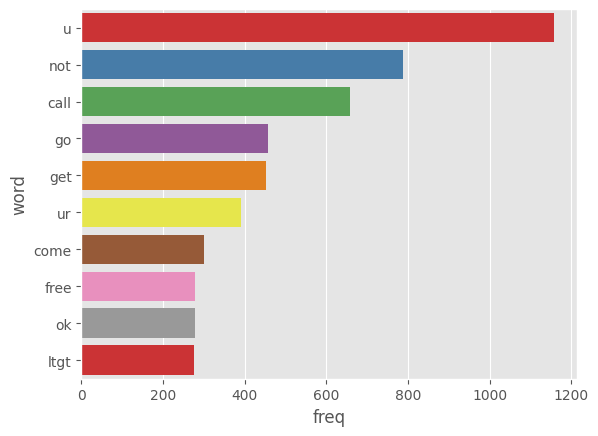

In [54]:
# Top 10 most frequent words
data = word_freq(df['stem'])
sns.barplot(data=data.head(10), x='freq', y='word', palette='Set1')
plt.show()

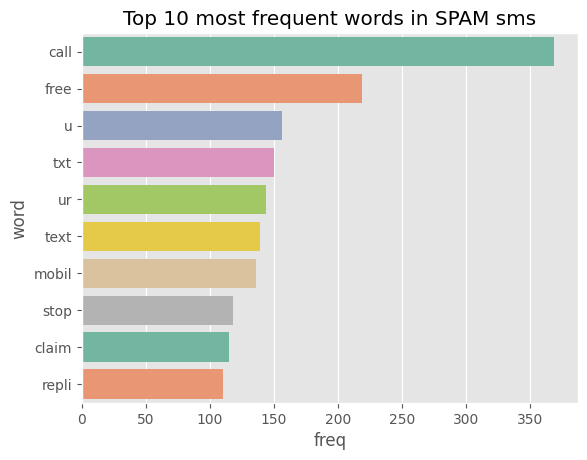

In [55]:
# Top 10 most frequent words in SPAM sms
data = word_freq(df[df['label']=='spam']['stem'])
sns.barplot(data=data.head(10), x='freq', y='word', palette='Set2')
plt.title('Top 10 most frequent words in SPAM sms')
plt.show()

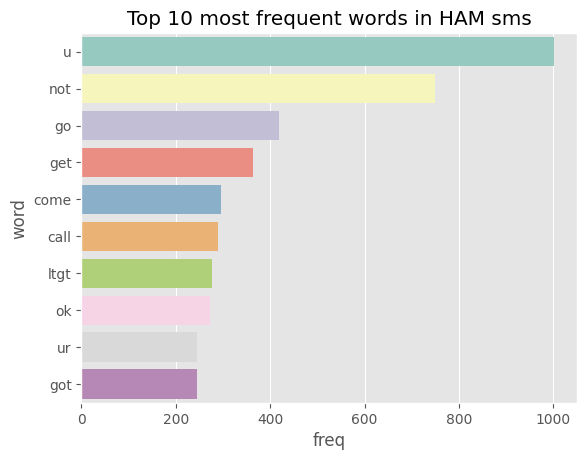

In [56]:
# Top 10 most frequent words in HAM sms
data = word_freq(df[df['label']=='ham']['stem'])
sns.barplot(data=data.head(10), x='freq', y='word',  palette='Set3')
plt.title('Top 10 most frequent words in HAM sms')
plt.show()

Summary:

* In spam SMS, frequently occurring words include: 'text', 'txt', 'car', 'stop', 'claim', 'reply'.

* In ham SMS (non-spam), common words include: 'come', 'ok'.

* Words like 'u', 'ur', 'got', if considered stopwords, can be added to the stopwords list.

### Length of Document

In [57]:
# df['stem'].apply(len)

In [58]:
# Adding a new colum # Length character
df['len_char'] = df['stem'].str.len()
df.head()

,label,message,prep1,prep2,prep3,prep4,prep5,prep6,stem,lemmatize,len_char
0,ham,"Go until jurong point, crazy.. Available only ...","go until jurong point, crazy.. available only ...","go until jurong point, crazy.. available only ...","go until jurong point, crazy.. available only ...",go until jurong point crazy available only in ...,go jurong point crazy available bugis n great ...,go jurong point crazy available bugis n great ...,go jurong point crazi avail bugi n great world...,go jurong point crazy available bugis n great ...,76
1,ham,Ok lar... Joking wif u oni...,ok lar... joking wif u oni...,ok lar... joking wif u oni...,ok lar... joking wif u oni...,ok lar joking wif u oni,ok lar joking wif u oni,ok lar joking wif u oni,ok lar joke wif u oni,ok lar joking wif u oni,21
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entry in a wkly comp to win fa cup final...,free entry in a wkly comp to win fa cup final...,free entry wkly comp win fa cup final tkts st ...,free entry wkly comp win fa cup final tkts st ...,free entri wkli comp win fa cup final tkts st ...,free entry wkly comp win fa cup final tkts st ...,104
3,ham,U dun say so early hor... U c already then say...,u dun say so early hor... u c already then say...,u dun say so early hor... u c already then say...,u dun say so early hor... u c already then say...,u dun say so early hor u c already then say,u dun say early hor u c already say,u dun say early hor u c already say,u dun say earli hor u c alreadi say,u dun say early hor u c already say,35
4,ham,"Nah I don't think he goes to usf, he lives aro...","nah i don't think he goes to usf, he lives aro...","nah i do not think he goes to usf, he lives ar...","nah i do not think he goes to usf, he lives ar...",nah i do not think he goes to usf he lives aro...,nah not think goes usf lives around though,nah not think goes usf lives around though,nah not think goe usf live around though,nah not think go usf life around though,40


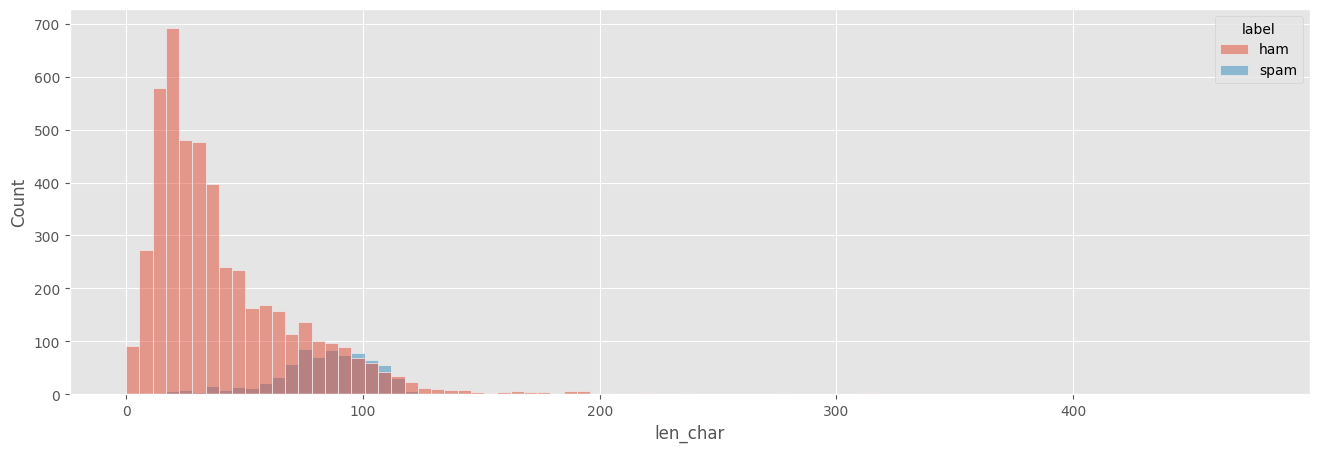

In [59]:
# Histogram # ham vs spam
plt.figure(figsize=(16,5))
sns.histplot(data=df, x='len_char', hue='label')
plt.show()

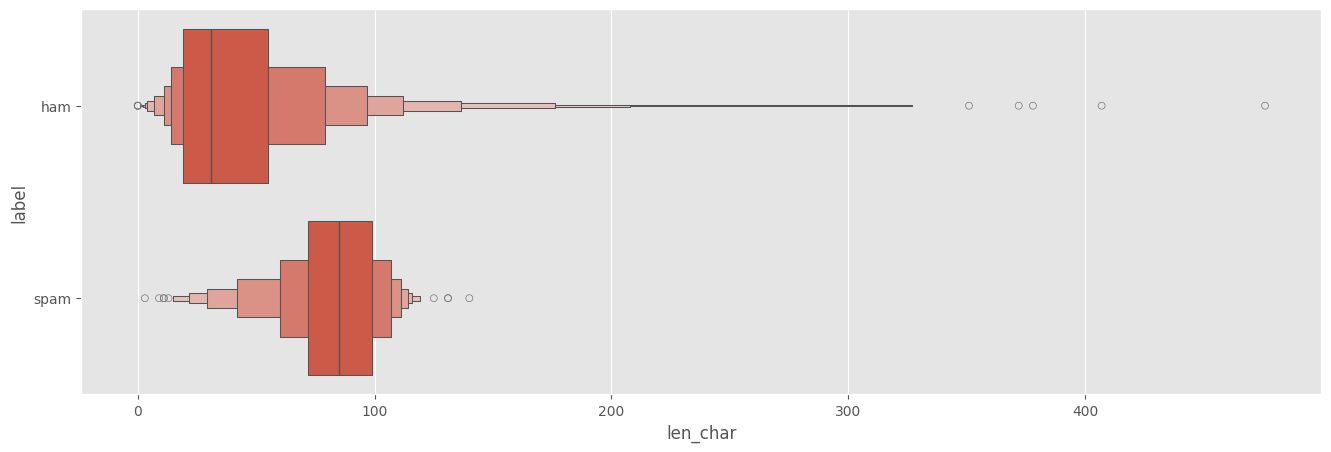

In [60]:
# Boxen plot
plt.figure(figsize=(16,5))
sns.boxenplot(data=df, x='len_char', y='label')
plt.show()

Insights
* "There is a tendency for spam SMS to have a longer character count compared to ham (non-spam) messages."


### Word Cloud

In [61]:
# pip install wordcloud

In [62]:
# Importing wordcloud library and supports
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from io import BytesIO
import requests

In [63]:
# Check
str(df['lemmatize'])

'0       go jurong point crazy available bugis n great ...\n1                                 ok lar joking wif u oni\n2       free entry wkly comp win fa cup final tkts st ...\n3                     u dun say early hor u c already say\n4                 nah not think go usf life around though\n                              ...                        \n5567    nd time tried contact u u £ pound prize claim ...\n5568                          ü b going esplanade fr home\n5569                           pity mood soany suggestion\n5570    guy bitching acted like interested buying some...\n5571                                       rofl true name\nName: lemmatize, Length: 5572, dtype: object'

In [64]:
# Extract and place into list
' '.join(df['stem'].str.extractall('(\w+)')[0].to_list())

'go jurong point crazi avail bugi n great world la e buffet cine got amor wat ok lar joke wif u oni free entri wkli comp win fa cup final tkts st may text fa receiv entri questionstd txt ratetc appli over u dun say earli hor u c alreadi say nah not think goe usf live around though freemsg hey darl week word back like fun still tb ok xxx std chgs send rcv even brother not like speak treat like aid patent per request mell mell oru minnaminungint nurungu vettam set callertun caller press copi friend callertun winner valu network custom select receivea prize reward claim call claim code kl valid hour mobil month u r entitl updat latest colour mobil camera free call mobil updat co free gon na home soon not want talk stuff anymor tonight k cri enough today six chanc win cash pound txt csh send cost pday day tsandc appli repli hl info urgent week free membership prize jackpot txt word claim tc wwwdbuknet lccltd pobox ldnwarw search right word thank breather promis wont take help grant fulfil 

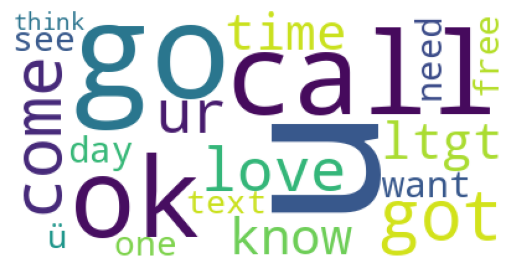

In [65]:
# Generating word cloud
# Start with one review:
text = ' '.join(df['stem'].str.extractall('(\w+)')[0].to_list())

# Create and generate a word cloud image:
wordcloud = WordCloud(max_words=20, background_color="white").generate(text)

# Display the generated image:
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

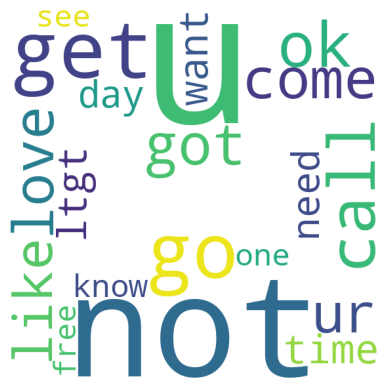

In [66]:
# Use external source materials

# From URL
response = requests.get("https://i.pinimg.com/564x/a1/84/0a/a1840a14b487ef2bee618d080221ec13.jpg")

my_mask = np.array(Image.open(BytesIO(response.content)))

# Start with one review:
text = ' '.join(df['stem'].str.extractall('(\w+)')[0].to_list())

# Create and generate a word cloud image:
wordcloud = WordCloud(
    max_words=20,
    background_color="white",
    mask= my_mask,
    stopwords=[]
    ).generate(text)

# Display the generated image:
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

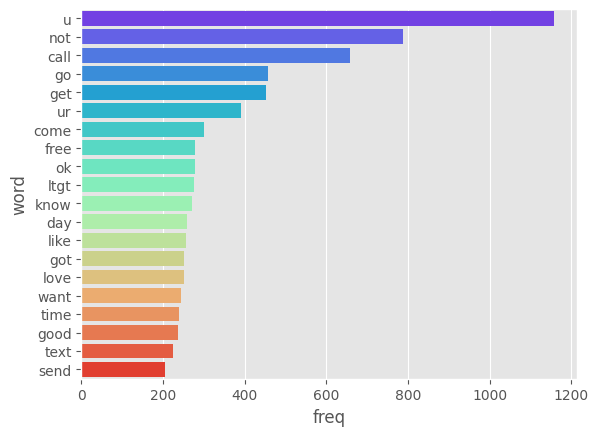

In [67]:
# Top 10 most frequent words
data = word_freq(df['stem'])
sns.barplot(data=data.head(20), x='freq', y='word', palette='rainbow')
plt.show()

---
# **Text Mining part 2**
---

This part two will explore the use of machine learning in text mining and how to apply it.


## **Bag of Words (Document Term Matrix)**

In this part 2, we will use Bag of Words concept represents. This concept tell us that each document as a collection(bag) of its words, ignoring grammar and word order, but keeping track of word frequency.

We will learn further more about:  
1.  TF (CountVectorizer)
2.  TF-IDF (TfIdfVectorizer)
3.  Applying the text mining method into binary classification

### **Term Frequency (TF)**

* Term frequency (TF) can be defined as the number of times a word (term) appears in document.
* It measures how important a word is within that specific document.





In [68]:
# Importing library for CountVectorizer and TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer


First of all, we need to turn the raw strings text into numerical features, as machine learning model only work with numbers.

**Corpus**

* Corpus can be defined as collection of documents. In text mining, it refers to the entire dataset of text that we are analyzing.
* The corpus below contains 3 documents. A document is a single piece of text within a corpus. It can be a sentence, a paragraph, or an entire article.

In [69]:
# corpus contains 3 documents
corpus = [
    'play open play',
    'messi come to barca',
    'fabregas leave barca'
]

#### **CountVectorizer**
* This tool breaks the text into words and counts how often each word appears in each message.
* CountVectorizer prepares the text into vectors (based on the settings how many n-grams).

In [70]:
# define vectorizer
vect_tf = CountVectorizer(ngram_range=(1,1))

# fit to corpus (learn 'vocabulary')
vect_tf.fit(corpus)

# transform into document term-matrix
dtm_tf = vect_tf.transform(corpus)
dtm_tf

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 9 stored elements and shape (3, 8)>

* Fitting process above allows machine to learn all the unique words in the dataset (the vocabulary)
* After that, we will create document-term matrix (dtm), one column per word, each cell = word count

In [71]:
# Displaying sparse matrix in array format
dtm_tf.toarray()

array([[0, 0, 0, 0, 0, 1, 2, 0],
       [1, 1, 0, 0, 1, 0, 0, 1],
       [1, 0, 1, 1, 0, 0, 0, 0]])

In [72]:
# Displaying columns - vectorize process output
vect_tf.get_feature_names_out()

array(['barca', 'come', 'fabregas', 'leave', 'messi', 'open', 'play',
       'to'], dtype=object)

In [73]:
# Display dataframe
pd.DataFrame(data=dtm_tf.toarray(), columns=vect_tf.get_feature_names_out())

,barca,come,fabregas,leave,messi,open,play,to
0,0,0,0,0,0,1,2,0
1,1,1,0,0,1,0,0,1
2,1,0,1,1,0,0,0,0


#### **Adjust n-gram**

* N-grams are combinations of N consecutive words.

* Unigram = 1 word (["text"]), Bigram = 2 words (["text mining"]), Trigram = 3 words, etc.

* Useful for capturing context or phrases

In [74]:
# 2-gram
# define vectorizer
vect_tf_2gram = CountVectorizer(ngram_range=(2,2))

# fit to corpus
vect_tf_2gram.fit(corpus)

# transform
dtm_tf_2gram = vect_tf_2gram.transform(corpus)
dtm_tf_2gram

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 7 stored elements and shape (3, 7)>

In [75]:
# Display dataframe 2-gram
pd.DataFrame(data=dtm_tf_2gram.toarray(), columns=vect_tf_2gram.get_feature_names_out())

,come to,fabregas leave,leave barca,messi come,open play,play open,to barca
0,0,0,0,0,1,1,0
1,1,0,0,1,0,0,1
2,0,1,1,0,0,0,0


### Term Frequency - Inverse Document Frequency (TF-IDF)

* This step Combines TF and IDF to highlight important words in each document while downweighting common ones.
* The TF-IDF that gives:
  * Higher score to words that appear often in a message, but
  * Lower score to words that appear in many messages (they’re less unique).



In [76]:
# Just Check
corpus

['play open play', 'messi come to barca', 'fabregas leave barca']

Now we want to change raw counts into TF-IDF values using TfidfVectorizer

In [77]:
# define vectorizer
vect_tfidf = TfidfVectorizer(norm=None)

# fit
vect_tfidf.fit(corpus)

# transform
dtm_tfidf = vect_tfidf.transform(corpus)
dtm_tfidf

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 9 stored elements and shape (3, 8)>

In [78]:
# TF-IDF
pd.DataFrame(data=dtm_tfidf.toarray().round(2), columns=vect_tfidf.get_feature_names_out())

,barca,come,fabregas,leave,messi,open,play,to
0,0.00,0.00,0.00,0.00,0.00,1.69,3.39,0.00
1,1.29,1.69,0.00,0.00,1.69,0.00,0.00,1.69
2,1.29,0.00,1.69,1.69,0.00,0.00,0.00,0.00


Each number is the importance score of the word in that message:

* "play" is very important in the first message, because it appears twice and nowhere else.

* "barca" appears in 2 messages, so its score is smaller in both --> small IDF score.

## **Study case - Binary Classification**

 In this study, we will use the previous SMS dataset, to classify whether a message is spam or not spam (ham).

In [79]:
# Importing library
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score, classification_report, confusion_matrix, PrecisionRecallDisplay, precision_recall_curve

### Dataset preparation

In [80]:
# Dataset preparation
df_clean = df[['lemmatize', 'label']].copy()
df_clean.head()

,lemmatize,label
0,go jurong point crazy available bugis n great ...,ham
1,ok lar joking wif u oni,ham
2,free entry wkly comp win fa cup final tkts st ...,spam
3,u dun say early hor u c already say,ham
4,nah not think go usf life around though,ham


In [81]:
# Converting --> spam: 1, ham:0
df_clean['label'] = np.where(df_clean['label']=='spam', 1, 0)
df_clean.head()

,lemmatize,label
0,go jurong point crazy available bugis n great ...,0
1,ok lar joking wif u oni,0
2,free entry wkly comp win fa cup final tkts st ...,1
3,u dun say early hor u c already say,0
4,nah not think go usf life around though,0


### Exploratory Data Analyasis (EDA)

We have finished the EDA step, previously in part I.

### Define text (as features) and y (Label/target)

In [82]:
# Define text (features) and y (target)
text = df_clean['lemmatize']
y = df_clean['label']

In [83]:
# Imbalance check (percentage)
y.value_counts() / len(y)

,count
label,
0,0.865937
1,0.134063


### Data splitting


In [84]:
# Data splitting # Train test split
text_train, text_test, y_train, y_test = train_test_split(
    text, y, test_size=0.2, stratify=y, random_state=0
    )

### Preprocessing

**Vectorizing**

In [85]:
# define vectorizer
vect = CountVectorizer(ngram_range=(1,1))

# fit
vect.fit(text_train)

# transform
X_train = vect.transform(text_train)
X_test = vect.transform(text_test)

In [86]:
# Converting the sparse matrix format to dataframe
X_train_df = pd.DataFrame(data=X_train.toarray(), columns=vect.get_feature_names_out())
X_test_df = pd.DataFrame(data=X_test.toarray(), columns=vect.get_feature_names_out())

In [87]:
# Check
X_train_df.head()

,aa,aah,aaniye,aaooooright,aathilove,aathiwhere,ab,abbey,abdomen,abeg,...,zero,zf,zhong,zindgi,zoe,zogtorius,zoom,zouk,zyada,üll
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [88]:
X_test_df.head()

,aa,aah,aaniye,aaooooright,aathilove,aathiwhere,ab,abbey,abdomen,abeg,...,zero,zf,zhong,zindgi,zoe,zogtorius,zoom,zouk,zyada,üll
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [89]:
X_train_df.columns

Index(['aa', 'aah', 'aaniye', 'aaooooright', 'aathilove', 'aathiwhere', 'ab',
       'abbey', 'abdomen', 'abeg',
       ...
       'zero', 'zf', 'zhong', 'zindgi', 'zoe', 'zogtorius', 'zoom', 'zouk',
       'zyada', 'üll'],
      dtype='object', length=7009)

### Modeling (Cross validation)

In [90]:
# Importing library
from imblearn.pipeline import Pipeline
from imblearn.under_sampling import RandomUnderSampler, NearMiss
from imblearn.over_sampling import RandomOverSampler, SMOTE

In [91]:
# Modeling
# define algo
model = DecisionTreeClassifier(max_depth=5, random_state=0)

# resampler
resampler = SMOTE(random_state=0)

# pipe_model
model_pipe = Pipeline([
    ('vectorizer', vect),  # Convert text_train (paragraph text) into X_train (DTM)
    ('resampler', resampler),
    ('model', model),
])

# cross val
cv_score = cross_val_score(
    estimator= model_pipe,
    X= text_train,
    y= y_train,
    scoring= 'f1',          # Metrics
    cv= 5
)

In [92]:
# Cross validation score
print(cv_score)
print(cv_score.mean())
print(cv_score.std())

[0.725      0.72243346 0.66086957 0.75454545 0.69298246]
0.7111661871958485
0.03181347170048632


### Hyperparameter tuning

In [93]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [94]:
# vectorizer
vect_tf = CountVectorizer(ngram_range=(1,1))
vect_tfidf = TfidfVectorizer(norm=None, ngram_range=(1,1))

**First Tuning**

In [95]:
# hyperparameter
hyperparam = {
    'model__max_depth': range(2,30),
    'model__min_samples_split': range(2,300,5),
    'model__min_samples_leaf': range(2,300,5),
    'resampler': [
        SMOTE(random_state=0),
        RandomOverSampler(random_state=0),
        RandomUnderSampler(random_state=0),
        NearMiss()
        ],
    'vectorizer': [vect_tf, vect_tfidf]
}

# pipe_model
model_pipe = Pipeline([
    ('vectorizer', vect_tf),
    ('resampler', resampler),
    ('model', model),
])

# randomized search
rs = RandomizedSearchCV(
    estimator= model_pipe,
    param_distributions= hyperparam,
    cv= 5,
    scoring= 'f1',
    n_jobs= -1,
    n_iter= 300,
    random_state= 0
)

In [96]:
# Fitting
rs.fit(text_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('vectorizer', CountVectorizer()),
                                             ('resampler',
                                              SMOTE(random_state=0)),
                                             ('model',
                                              DecisionTreeClassifier(max_depth=5,
                                                                     random_state=0))]),
                   n_iter=300, n_jobs=-1,
                   param_distributions={'model__max_depth': range(2, 30),
                                        'model__min_samples_leaf': range(2, 300, 5),
                                        'model__min_samples_split': range(2, 300, 5),
                                        'resampler': [SMOTE(random_state=0),
                                                      RandomOverSampler(random_state=0),
                                                      RandomUnderSampler(random_state=0),
                                                      NearMiss()],
                                        'vectorizer': [CountVectorizer(),
                                                       TfidfVectorizer(norm=None)]},
                   random_state=0, scoring='f1')

In [97]:
# Best score
rs.best_score_

np.float64(0.7789038878941709)

In [98]:
pd.DataFrame(rs.cv_results_).sort_values('rank_test_score').head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_vectorizer,param_resampler,param_model__min_samples_split,param_model__min_samples_leaf,param_model__max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
279,0.468737,0.034307,0.040216,0.011220,TfidfVectorizer(norm=None),SMOTE(random_state=0),162,2,17,"{'vectorizer': TfidfVectorizer(norm=None), 're...",0.728571,0.790875,0.761905,0.806584,0.806584,0.778904,0.029993,1
294,0.244223,0.023701,0.020481,0.000889,TfidfVectorizer(norm=None),SMOTE(random_state=0),202,7,22,"{'vectorizer': TfidfVectorizer(norm=None), 're...",0.715278,0.745387,0.769231,0.806202,0.780876,0.763395,0.031021,2
185,0.312269,0.062095,0.034153,0.010561,CountVectorizer(),SMOTE(random_state=0),67,2,16,"{'vectorizer': CountVectorizer(), 'resampler':...",0.746988,0.772908,0.709402,0.766355,0.751131,0.749357,0.022130,3
265,0.250505,0.040114,0.029076,0.008235,CountVectorizer(),SMOTE(random_state=0),137,2,9,"{'vectorizer': CountVectorizer(), 'resampler':...",0.760000,0.759690,0.694561,0.764977,0.713656,0.738577,0.028845,4
20,0.366076,0.097205,0.036446,0.014987,TfidfVectorizer(norm=None),SMOTE(random_state=0),17,22,23,"{'vectorizer': TfidfVectorizer(norm=None), 're...",0.705882,0.696833,0.728111,0.759615,0.774775,0.733043,0.030069,5


**Second Tuning**

In [99]:
# hyperparameter
hyperparam = {
    'model__max_depth': range(8,25),
    'model__min_samples_split': range(60,200,2),
    'model__min_samples_leaf': range(2,20,2),
    'resampler': [
        SMOTE(random_state=0),
        RandomOverSampler(random_state=0)
        ],
    'vectorizer': [vect_tf, vect_tfidf]
}

# pipe_model
model_pipe = Pipeline([
    ('vectorizer', vect_tf),
    ('resampler', resampler),
    ('model', model),
])

# randomized search
rs2 = RandomizedSearchCV(
    estimator= model_pipe,
    param_distributions= hyperparam,
    cv= 5,
    scoring= 'f1',
    n_jobs= -1,
    n_iter= 500,
    random_state= 0
)

In [100]:
# Fitting
rs2.fit(text_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('vectorizer', CountVectorizer()),
                                             ('resampler',
                                              SMOTE(random_state=0)),
                                             ('model',
                                              DecisionTreeClassifier(max_depth=5,
                                                                     random_state=0))]),
                   n_iter=500, n_jobs=-1,
                   param_distributions={'model__max_depth': range(8, 25),
                                        'model__min_samples_leaf': range(2, 20, 2),
                                        'model__min_samples_split': range(60, 200, 2),
                                        'resampler': [SMOTE(random_state=0),
                                                      RandomOverSampler(random_state=0)],
                                        'vectorizer': [CountVectorizer(),
                                                       TfidfVectorizer(norm=None)]},
                   random_state=0, scoring='f1')

In [101]:
# Best score
rs2.best_score_

np.float64(0.8063421972697103)

In [102]:
# Best parameter
rs2.best_params_

{'vectorizer': TfidfVectorizer(norm=None),
 'resampler': SMOTE(random_state=0),
 'model__min_samples_split': 62,
 'model__min_samples_leaf': 2,
 'model__max_depth': 24}

Model performance in training set

* Benchmark: 0.71
* Tuning 1: 0.78
* Tuning 2: 0.81

### Predicting on the test set

**Before Tuning**

In [103]:
# Modeling # Before tuning
# define algo
model = DecisionTreeClassifier(max_depth=5, random_state=0)

# resampler
resampler = SMOTE(random_state=0)

# pipe_model
model_pipe = Pipeline([
    ('vectorizer', vect),  # mengubah text_train (paragraf) menjadi X_train (DTM)
    ('resampler', resampler),
    ('model', model),
])

# fit
model_pipe.fit(text_train, y_train)

# predict
y_pred_before = model_pipe.predict(text_test)

# f1
f1_score(y_test, y_pred_before)

0.7028985507246377

**After tuning**

In [104]:
# best model
best_model = rs2.best_estimator_

# fit
best_model.fit(text_train, y_train)

# predict
y_pred_after = best_model.predict(text_test)

# f1
f1_score(y_test, y_pred_after)

0.8054607508532423

In [105]:
# Result
print(f1_score(y_test, y_pred_before), 'before tuning')
print(f1_score(y_test, y_pred_after), 'after tuning')

0.7028985507246377 before tuning
0.8054607508532423 after tuning


We get better result after tuning

Text(0.5, 1.0, 'After Tuning')

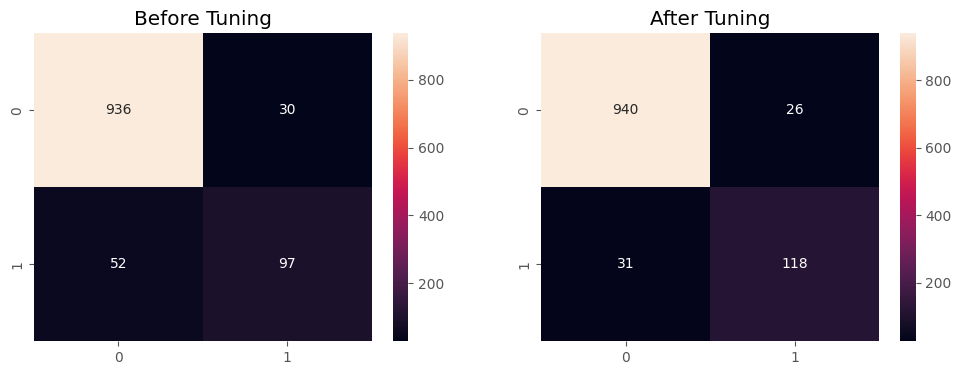

In [106]:
# Confusion matrix before and after tuning
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
sns.heatmap(confusion_matrix(y_test, y_pred_before), annot=True, fmt='.0f')
plt.title('Before Tuning')

plt.subplot(1,2,2)
sns.heatmap(confusion_matrix(y_test, y_pred_after), annot=True, fmt='.0f')
plt.title('After Tuning')

In [107]:
# best model
best_model = rs2.best_estimator_

# fit
best_model.fit(text_train, y_train)

# predict
y_pred_after_proba = best_model.predict_proba(text_test)[:, 1]
y_pred_after_proba

array([0.98526561, 0.00887235, 0.00887235, ..., 0.        , 0.00887235,
       0.00887235])

In [108]:
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_after_proba)

In [109]:
df_th = pd.DataFrame()
df_th['thresholds'] = list(thresholds) + [1]
df_th['precision'] = precision
df_th['recall'] = recall
df_th

,thresholds,precision,recall
0,0.000000,0.133632,1.000000
1,0.008872,0.135768,0.973154
2,0.176471,0.748503,0.838926
3,0.250000,0.762195,0.838926
4,0.294118,0.759259,0.825503
5,0.333333,0.768750,0.825503
6,0.508197,0.819444,0.791946
7,0.636364,0.837037,0.758389
8,0.750000,0.849624,0.758389
9,0.875000,0.868217,0.751678


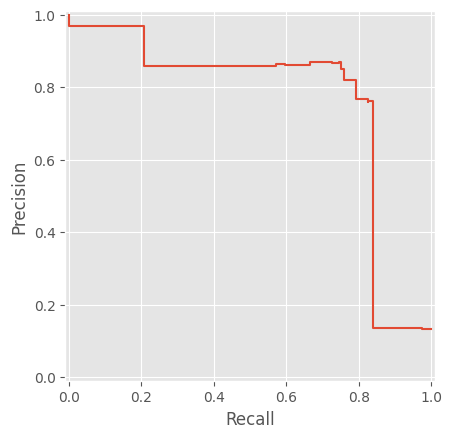

In [110]:
# Precision Recall plot
PrecisionRecallDisplay(precision, recall).plot()

### After tuning Optimized threshold

In [111]:
# best model
best_model = rs2.best_estimator_

# fit
best_model.fit(text_train, y_train)

# predict
y_pred_after_proba = best_model.predict_proba(text_test)[:, 1]
y_pred_after_proba

y_pred_after_class = np.where(y_pred_after_proba > 0.99, 1, 0)
y_pred_after_class

array([0, 0, 0, ..., 0, 0, 0])

Text(0.5, 1.0, 'Optimized Threshold')

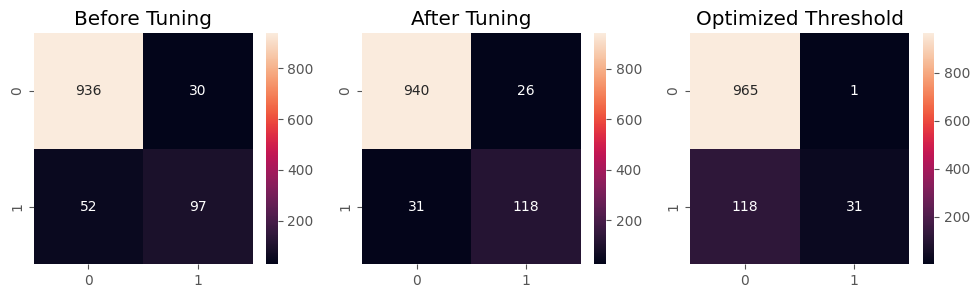

In [113]:
# Confusion matrix # Before tuning # After tuning # Optimized threshold
plt.figure(figsize=(12,3))

plt.subplot(1,3,1)
sns.heatmap(confusion_matrix(y_test, y_pred_before), annot=True, fmt='.0f')
plt.title('Before Tuning')

plt.subplot(1,3,2)
sns.heatmap(confusion_matrix(y_test, y_pred_after), annot=True, fmt='.0f')
plt.title('After Tuning')

plt.subplot(1,3,3)
sns.heatmap(confusion_matrix(y_test, y_pred_after_class), annot=True, fmt='.0f')
plt.title('Optimized Threshold')

* The after tuning model provides the more balanced result than the before tuning model. It missed fewer spam messages than the before tuning model.
* The Optimized Threshold model is useful if we want to avoid false alarms (FPs) at all costs but are okay with missing spams.